In [1]:
import torch
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
import collections
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [2]:
file = "dataset\\YSYW_seq\\ECG\\processed_tr03-0005.npy"
data = np.load(file, allow_pickle=True).item()
sig = data["sig"]
sig.shape

(100, 6000)

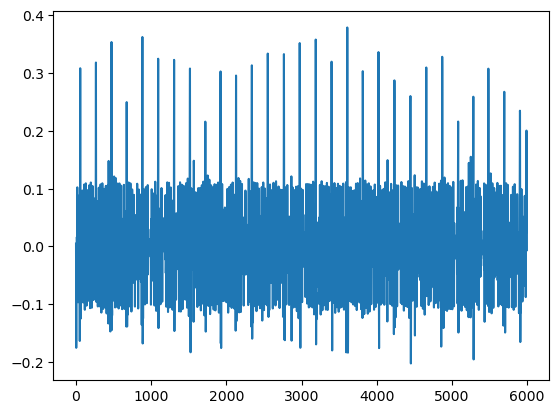

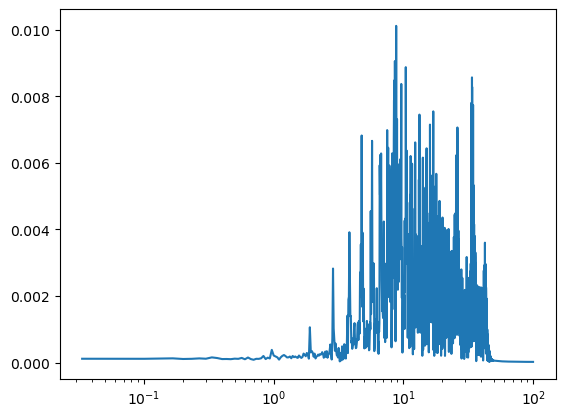

In [3]:
sig_frame = sig[1]
plt.plot(sig_frame)
plt.show()
### FFT: tの関数をfの関数にする ###
N = len(sig_frame)
dt = 0.005
y_fft = np.fft.fft(sig_frame) # 離散フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）

plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # A-f グラフのプロット
plt.xscale("log") # 横軸を対数軸にセット
plt.show()

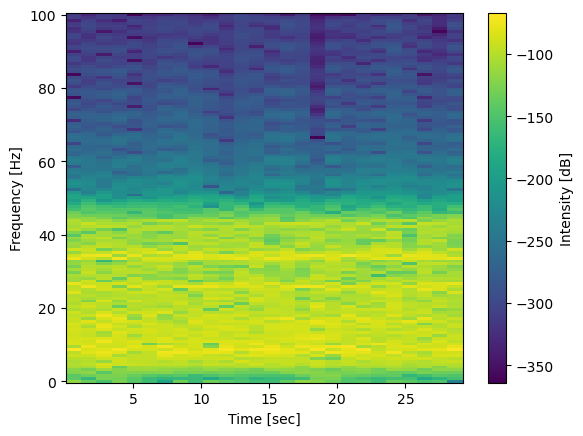

In [4]:
from scipy import signal
import numpy as np
#スペクトログラム分析の実施
fs = 200
f, t, Sxx = signal.spectrogram(sig_frame, fs)

#図の描画
plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

In [53]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import skimage
import PIL

sr = 200

timeseries_data = sig[30]# ここにあなたのデータを入力してください

n_fft = 2048      # FFTの窓の幅
hop_length = 512  # フレーム間のステップ数

# STFTを用いてスペクトログラムを計算
D = np.abs(librosa.stft(timeseries_data, n_fft=n_fft, hop_length=hop_length))
# 対数スペクトログラムを計算
D = librosa.amplitude_to_db(D, ref=np.max)

# 画像として表示
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
ax.axis('off')  # 軸の数値を表示しない

#余白削除
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

# フィギュアのRGBデータを取得しPillowのImageに変換
fig.canvas.draw()
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = PIL.Image.frombytes('RGB', fig.canvas.get_width_height(), data)

# リサイズ
img_resized = image.resize((224, 224))

plt.close()

img_np = np.array(img_resized)

(224, 224, 3)

In [54]:
def wav2spec(sig, n_fft=2048, hop_length=512, sr=200):
    # STFTを用いてスペクトログラムを計算
    D = np.abs(librosa.stft(sig, n_fft=n_fft, hop_length=hop_length))
    # 対数スペクトログラムを計算
    D = librosa.amplitude_to_db(D, ref=np.max)
    # 画像として表示
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.axis('off')  # 軸の数値を表示しない
    #余白削除
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # フィギュアのRGBデータを取得しPillowのImageに変換
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = Image.frombytes('RGB', fig.canvas.get_width_height(), data)
    # リサイズ
    img_resized = image.resize((224, 224))
    plt.close()
    img_np = np.array(img_resized)
    
    return img_np